In [ ]:
import cv2
import numpy as np

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame= cap.read()   # Forever it returns the frame and ret which is false or true
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #if you want to convert the color
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)   # to show the gray video

    if cv2.waitKey(1) & 0xFF == ord('q'):   # If q is pressed stop
        break

cap.release()
cv2.destroyAllWindows()

Question 1:

In the code above, we start the video camera and start reading the video frame by frame. For each frame, we convert it to gray scale and show both the colored image and the gray scale image using imshow. We break the loop using 'q' key. After that, we release the object to read video and close all the windows

Question 2; Code below:

In [ ]:
from tensorflow import keras
new_model = keras.models.load_model('shreya_karan_model.h5')

In [ ]:
def get_img_contour_thresh(img):
    x, y, w, h = 0, 0, 300, 300
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (35, 35), 0)
    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    thresh1 = thresh1[y:y + h, x:x + w]
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    return img, contours, thresh1

In [ ]:
cap = cv2.VideoCapture(0)
ret, img = cap.read()
while (cap.isOpened()):
    ret, img = cap.read()
    ret
    img, contours, thresh = get_img_contour_thresh(img)
    ans1 = ''
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        if cv2.contourArea(contour) > 2500:
            # print(predict(w_from_model,b_from_model,contour))
            x, y, w, h = cv2.boundingRect(contour)
            # newImage = thresh[y - 15:y + h + 15, x - 15:x + w +15]
            newImage = thresh[y:y + h, x:x + w]
            newImage = cv2.resize(newImage, (28, 28))
            newImage = np.array(newImage)
            newImage = newImage.flatten()
            newImage = newImage.reshape(newImage.shape[0], 1)
            newImage2 = newImage.flatten().reshape(1,28,28,1)
            newImage2 = newImage2.astype('float32')
            newImage2 /= 255
            result = new_model.predict(newImage2)
            ans1= np.argmax(result)
            #ans1 = Digit_Recognizer_LR.predict(w_LR, b_LR, newImage)
    x, y, w, h = 0, 0, 300, 300
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, "Prediction : " + str(ans1), (10, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.imshow("Frame", img)
    cv2.imshow("Contours", thresh)
    k = cv2.waitKey(10)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

Face Recognition

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow('Lab 3 Face recognition',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

## Step 2 : RNN and text classification

In [ ]:
from google.colab import drive
drive.mount('/content/shreya/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

Question Number: 3
Answer:

Meaning of word embedding - Word embedding is the representation of the words that are used for Text Analysis. It is usually in a form of a vector. Mostly word that are have close to same meaning i.e. they are sunnonys are grouped near to each other in vector Space. For example: Man, Woman are very likely in one vector space. Queen and King ; Lion and Lioness; etc. These embedded workds are used to train on the data to benefit and help in contextual sentence formation/information.

In [ ]:
# design model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
print(model.summary())
final_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3,
batch_size=64)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_6 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 43s 103ms/step - loss: 0.5212 - accuracy: 0.7323 - val_loss: 0.3397 - val_accuracy: 0.8602
Epoch 2/3
391/391 [==============================] - 40s 102ms/step - loss: 0.3143 - accuracy: 0.8714 - val_loss: 0.3345 - val_accuracy: 0.8638
Epoch 3/3
391/391 [

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.82%


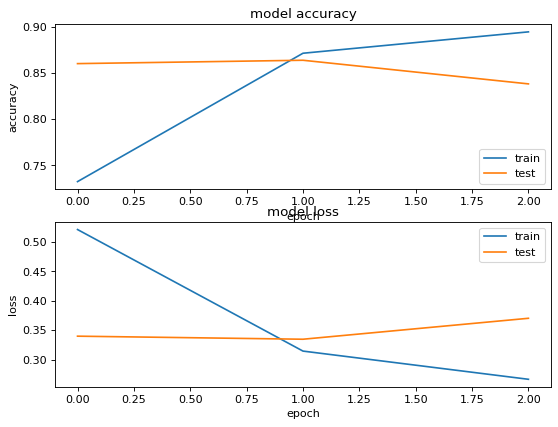

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

Question4 : here we can see the graph started good, but then we encounter a gap between the train and tesst lines. That is because there is overfitting. That means the model that we tunned knows the training data too well. This shall definetly impactthe model performance on new exposed data. To reduce that, we shall be adding dropout layers to our model.

In [ ]:
# Add a dropout to see how the model changes.
# With the dropout layer
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
print(model.summary())
final_model_drop = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 500, 32)           160000    
                                                                 
 dropout_15 (Dropout)        (None, 500, 32)           0         
                                                                 
 lstm_24 (LSTM)              (None, 100)               53200     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 43s 104ms/step - loss: 0.5631 - accuracy: 0.7078 - val_loss: 0.3601 - val_accuracy: 0.8512
Epoch 2/3
391/391 [===========

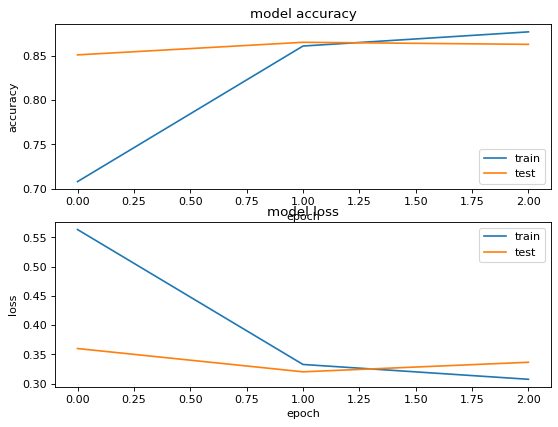

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(final_model_drop.history['accuracy'])
plt.plot(final_model_drop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model_drop.history['loss'])
plt.plot(final_model_drop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

Yes, after adding the dropout layers, the overfitting scenario is reduced as that is reflected in the graph above.

In [ ]:
#Question 6: Adding a CNN layer.
#With the dropout layer adding CNN
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.2))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=32,  kernel_size=3, strides=1, activation='relu',padding='causal'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
print(model.summary())
final_model_drop_cnn = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
